In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('BreadBasket_DMS.csv')

In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [6]:
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

('Unique Items: ', 95)
('\n', array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Pop

In [7]:
#data cleaning , drop those rows which contains Item value as "NONE"
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB
None


In [9]:
#data engineering 
# Year
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [10]:
#most sold top-15 items from the bakery
ms = df['Item'].value_counts().head(15)
print('Most Sold Items: \n')
print(ms)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Name: Item, dtype: int64


In [11]:
df.head()

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1,Bread,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016,10,30


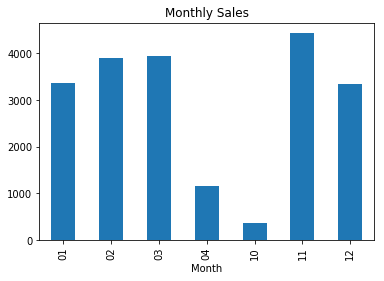

In [12]:
df.groupby('Month')['Transaction'].count().plot(kind='bar', title='Monthly Sales')
plt.show()

In [17]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

ImportError: No module named mlxtend.preprocessing